In [0]:
def f(x):
    return x*x

def numerical_derivative_1d(func, epsilon):
    def deriv_func(x):
        new_x = x + epsilon
        return (func(new_x) - func(x))/(new_x - x)
    return deriv_func

deriv = numerical_derivative_1d(f,0.01)
print(deriv(1)) # 2  ОК. Производная  для х*х = 2*х = 2*1 = 2  

2.009999999999999


In [0]:
def grad_descent_v1(func, deriv, start=None, callback=None):
    """ 
    Реализация градиентного спуска для функций с одним локальным минимумом,
    совпадающим с глобальным. Все тесты будут иметь такую природу.
    :param func: float -> float — функция 
    :param deriv: float -> float — её производная
    :param start: float — начальная точка
    """
    if start is None:
        # Если точка не дана, сгенерируем случайную
        # из стандартного нормального распределения.
        # При таком подходе начальная точка может быть
        # любой, а не только из какого-то ограниченного диапазона
        np.random.seed(179)
        start = np.random.randn()

    estimate = start
    callback(estimate, func(estimate))  # не забывайте логировать шаги!
    lr = 10e-2

    for i in range(10000):
        estimate = estimate - lr * deriv(estimate)
    # YOUR CODE

    return estimate

In [0]:
import random
import inspect
import numpy as np

def grad_descent_v2(func, deriv, low=None, high=None, callback=None):
    #print ('{},{}, low={}, high={}'.format(inspect.getsource(func), inspect.getsource(deriv), low, high))
        
    """ 
    Реализация градиентного спуска для функций с несколькими локальным минимумами,
    но с известной окрестностью глобального минимума. 
    Все тесты будут иметь такую природу.
    :param func: float -> float — функция 
    :param deriv: float -> float — её производная
    :param low: float — левая граница окрестности
    :param high: float — правая граница окрестности
    """
    extremums = {}
    for i in np.arange(low, high, 0.001):
        if i == 0.0:
            continue
        if deriv(i) < 0.001:
            extremums[func(i)] = i
    return extremums[min(extremums)] 

TypeError: ignored

In [0]:
import random
import numpy as np

def numerical_derivative_2d(func, epsilon):
    """
    Функция для приближённого вычисления градиента функции двух переменных. 
    :param func: np.ndarray -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по осям
    :return: другая функция, которая приближённо вычисляет градиент в точке
    """
    def grad_func(x):
        """
        :param x: np.ndarray — точка, в которой нужно вычислить производную
        :return: приближённое значение производной в этой точке
        """
        x0 = x[0]
        x1 = x[1]
        x0 = (func([x[0] + epsilon, x[1]]) - func(x)) / epsilon
        x1 = (func([x[0], x[1] + epsilon]) - func(x)) / epsilon
        return [x0, x1]
    return grad_func


def grad_descent_2d(func, low = -5, high = 5, callback=None):
    """ 
    Реализация градиентного спуска для функций двух переменных 
    с несколькими локальным минимумами, но известной квадратной окрестностью
    глобального минимума. Все тесты будут иметь такую природу.

    Обратите внимание, что здесь градиент функции не дан.
    Его нужно вычислять приближённо.

    :param func: np.ndarray -> float — функция 
    :param low: левая граница интервала по каждой из осей
    :param high: правая граница интервала по каждой из осей
    """
    best_estimates = []

    epsilon = 0.01
    deriv = numerical_derivative_2d(func, epsilon)
    x = [low, low]
    min = [low, low]
    log_steps = 0
    print(x[0], x[1])
    while abs(deriv(x)[0]) > 0.0001 and abs(deriv(x)[1]) > 0.0001 and log_steps <= 100000:
        
        x[0] = x[0] - epsilon * deriv(x)[0]
        x[1] = x[1] - epsilon * deriv(x)[1]
        # print(x[0],x[1])
        if func(x) < func(min):
            min[0] = x[0]
            min[1] = x[1]
        log_steps += 1

    return min

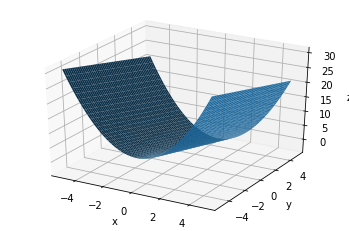

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def test2(x, y):
    z = x**2 + y**2 + 1
    return z

def test2(x):
    z = x[0]**2 - x[1] + 1
    return z
#   for i in range(1,n+1):
#     s += (y[i]-(w_0+w_1*x[i]))**2
#   return s

def draw_3d():
    x = np.linspace(-5.0, 5.0, 1000)
    y = np.linspace(-5.0, 5.0, 1000)

    x, y = np.meshgrid(x, y)
    z = test(x, y)

    fig = plt.figure()
    ax = fig.gca(projection='3d') # get current axis
    surf = ax.plot_surface(x, y, z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    # fig.set_size_inches(10,10)
    plt.show()

draw_3d()

In [0]:
grad_descent_2d(test2)

-5 -5


[-0.0050498194165740085, 0.6999999999999443]

In [0]:
import random

def numerical_derivative_2d(func, epsilon):
    """
    Функция для приближённого вычисления градиента функции двух переменных. 
    :param func: np.ndarray -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по осям
    :return: другая функция, которая приближённо вычисляет градиент в точке
    """
    def grad_func(x):
        """
        :param x: np.ndarray — точка, в которой нужно вычислить производную
        :return: приближённое значение производной в этой точке
        """
        x0 = x[0]
        x1 = x[1]
        x0 = (func([x[0] + epsilon, x[1]]) - func(x)) / epsilon
        x1 = (func([x[0], x[1] + epsilon]) - func(x)) / epsilon
        return [x0, x1]
    return grad_func


def grad_descent_2d(func, low = -5, high = 5, callback=None):
    """ 
    Реализация градиентного спуска для функций двух переменных 
    с несколькими локальным минимумами, но известной квадратной окрестностью
    глобального минимума. Все тесты будут иметь такую природу.

    Обратите внимание, что здесь градиент функции не дан.
    Его нужно вычислять приближённо.

    :param func: np.ndarray -> float — функция 
    :param low: левая граница интервала по каждой из осей
    :param high: правая граница интервала по каждой из осей
    """
  
    best_estimates = []

    epsilon = 0.01
    deriv = numerical_derivative_2d(func, epsilon)
    
    mn = [0, 0]
    for i in range(1000):
        z = [random.uniform(-5,5), random.uniform(-5,5)]
        if func(z) < func(mn):
            mn[0] = z[0]
            mn[1] = z[1]        

    log_steps = 0
    x = mn
    for i in range(10):
        epsilon = random.uniform(0,1) # рандомная величина шага
        while abs(deriv(x)[0]) > 0.001 and abs(deriv(x)[1]) > 0.001 and log_steps <= 10000:
            
            x[0] = x[0] - epsilon * deriv(x)[0]
            x[1] = x[1] - epsilon * deriv(x)[1]
            callback([x[0],x[1]], func(x))
            if func(x) < func(mn):
                mn[0] = x[0]
                mn[1] = x[1]
            log_steps += 1
    mn[0] = round(mn[0],1)
    mn[1] = round(mn[1],1)
    return mn

In [91]:
def f(x,y):
    return y*2 - x*3

x = np.linspace(1,4,4) # Простой массив
y = np.linspace(17,20,4)
xc, yc = np.meshgrid(x,y)
z = f(xc, yc)

print(xc.ravel())
print(yc.ravel())
print('y*2 - x*3')
print(z.ravel())
print(np.argmin(z))
print(z.ravel()[np.argmin(z)])

[1. 2. 3. 4. 1. 2. 3. 4. 1. 2. 3. 4. 1. 2. 3. 4.]
[17. 17. 17. 17. 18. 18. 18. 18. 19. 19. 19. 19. 20. 20. 20. 20.]
y*2 - x*3
[31. 28. 25. 22. 33. 30. 27. 24. 35. 32. 29. 26. 37. 34. 31. 28.]
3
22.0


In [0]:
x = np.linspace(1,4,4) # Простой массив
y = np.linspace(17,20,4)
grid = np.meshgrid(x,y)

# Функция dstack() соединяет массивы вдоль третьей оси.
# К двумерным массивам размером (MxN) третья ось добавляется справа, что приводит к форме (MxNx1)
# print(grid)
# print(np.dstack(grid))
fvalues = np.dstack(grid).reshape(-1, 2)
# print(fvalues)

In [109]:
n = np.array([[1,1,1,1],[2,2,2,2],[3,3,3,3]])
print(n)
print(n.shape)
n.reshape(-1,3)

[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]
(3, 4)


array([[1, 1, 1],
       [1, 2, 2],
       [2, 2, 3],
       [3, 3, 3]])

In [0]:
    x = np.linspace(0,5,20) # Простой массив
    y = np.linspace(-5,0,20)
    xc, yc = np.meshgrid(x,y)
    # xc = 20x20 массив из 20 массивов из всех значений x
    # yc = 20x20 массив из 20 массивов по очереди из 1 значения y
    f = test(xc, yc) # 20х20 массив их решения функции для каждого значения из матрицы Х=20х20 и У=20х20
    f = f.ravel() # Плоский список 1x400
    minf = np.argmin(f) # минимальное значение из списка, возвращает индекс
    
    print(xc.ravel()[minf], yc.ravel()[minf])

0.0 0.0
